# About 
Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

In [45]:
# import necessary liberary 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LinearRegression

In [2]:
# import dataset 
df = pd.read_csv('advertising (1).csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# data Cleaning

In [11]:
# finding null values 
df.isnull().sum() # no null values in dataset

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
# shape 
df.shape

(200, 4)

In [12]:
df.drop_duplicates(inplace=True) # no duplicate values

In [10]:
df.shape

(200, 4)

In [13]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# EDA 

In [15]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


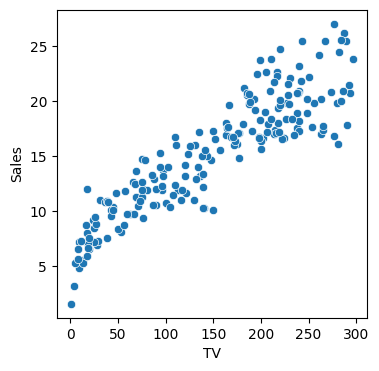

In [25]:
# how many tv are  sale
plt.figure(figsize=(4,4))
sns.scatterplot(x='TV',y='Sales', data=df)
plt.show()

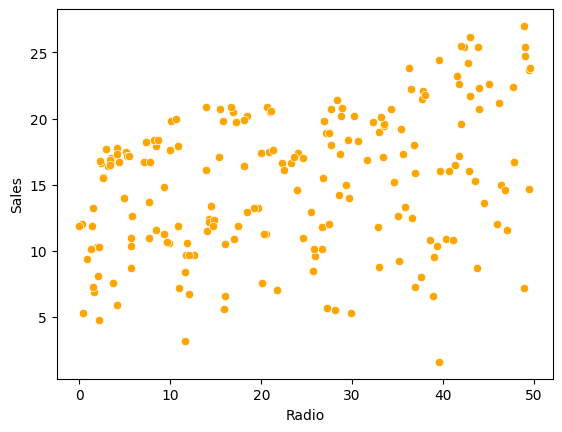

In [28]:
# How many Radio are sales
sns.scatterplot(x='Radio',y='Sales', data=df, color= 'orange')
plt.show()

In [29]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


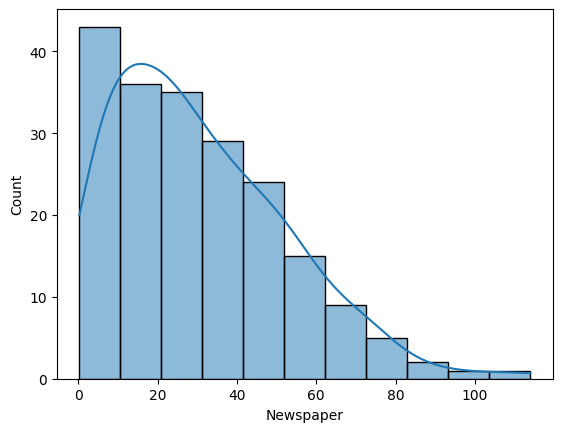

In [31]:
sns.histplot(x='Newspaper', data=df, kde=True)
plt.show()

# Model Building

In [33]:
X= df[['TV','Radio','Newspaper']]
y= df['Sales']

In [49]:
X.shape

(200, 3)

In [50]:
y.shape

(200,)

# Model Training

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.2, random_state=42)

In [35]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
X.shape

(200, 3)

In [48]:
y.shape

(200,)

In [39]:
y_train

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 160, dtype: float64

In [40]:
pred = model.predict(X_train)
print(pred)

[11.91465765 15.32881375  9.91093345  9.46132618 17.23412363  7.22972412
 10.35454191 15.23876611 11.14036535 11.71856758 13.85060866 14.66570876
 10.44983379  9.28550764  9.02357336 12.47875166 10.48712079 24.99748731
  7.88523289 15.8640533  21.30888748 17.00814942 12.79206695  9.84041429
 21.01070892  7.48343928 23.52204082  7.05636619 12.56968457 10.08676368
 11.1715446   9.12566707 16.92180225 17.90167068 15.63428805 18.26514616
 15.51584207 19.23176429 17.48701831 21.82555114 10.58560762 14.22101675
 10.75778538 18.10690693  9.94580615 17.38762989 13.21321157 23.7057409
 11.04124955 23.50498043  7.25377772 19.17388849 24.9725586  21.21199698
 18.85730214 16.49383903 13.90044002 11.26132856 19.58689909 15.32197517
 15.91287266 10.29394498 20.24916557 12.59260311 21.37507598 11.62060518
  9.00761916 19.44123849 15.85637182 18.5764323   9.57905955 21.37254028
 24.69974685 18.22258697 18.82367855 14.9707016  16.30608241  8.86438172
 17.37327271 21.11096152 18.14037337  5.57959415  6.